## EECS 731 Project 6

### Step 0: Import relevant packages

In [1]:
# Import libraries necessary for this project
import sklearn
#import networkx as nx
import numpy  as np
import pandas as pd
import seaborn as sns; sns.set()
import datetime as dt
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from pandas import compat

import os
import time
import pandas as pd
import numpy  as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

compat.PY3 = True
print ("-----------------------------------------------------------------------")
print('The scikit-learn version is {}.'.format(sklearn.__version__))

-----------------------------------------------------------------------
The scikit-learn version is 0.20.3.


### Step 1: Pre requisite functions

#### This function load the data from the given path and finename

In [2]:
def loadData(path,filename):
    try:
             files = os.listdir(path)
             for f in files:
                 if f == filename:
                     data = pd.read_csv(os.path.join(path,f))
                     return data
            
    except Exception as ex:
           print ("-----------------------------------------------------------------------")
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print (message)

#### This function derives the shape of the dataset and returns the feature and target columns

In [3]:
def exploreData(data):
    try:
           #Total number of records                                  
           rows = data.shape[0]
           cols = data.shape[1]    
          
           # Print the results
           print ("-----------------------------------------------------------------------")
           print ("Total number of records: {}".format(rows))
           print ("Total number of features: {}".format(cols))
           print ("-----------------------------------------------------------------------")
           
    except Exception as ex:
           print ("-----------------------------------------------------------------------")
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print (message)

#### This function computes the percentage of missing values per each column in the given dataset

In [4]:
def missingValues(data):
    try:
           # Total missing values
           mis_val = data.isnull().sum()
         
           # Percentage of missing values
           mis_val_percent = 100 * mis_val / len(data)
           
           # Make a table with the results
           mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
           
           # Rename the columns
           mis_val_table_ren_columns = mis_val_table.rename(
           columns = {0 : 'Missing Values', 1 : '% of Total Values'})
           mis_val_table_ren_columns.head(4 )
           # Sort the table by percentage of missing descending
           misVal = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
                   '% of Total Values', ascending=False).round(1)
                     
           return misVal, mis_val_table_ren_columns

    except Exception as ex:
           print ("-----------------------------------------------------------------------")
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print (message)

#### This method scale the numerical features and label encoding for categorical features 

In [5]:
def transformData(df):
    try:    
        # TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
        #features_final = pd.get_dummies(features_log_minmax_transform)
        
        features_log_minmax_transform = pd.DataFrame(data = df)

#        scaler = MinMaxScaler() # default=(0, 1)
#        numerical = df.columns
        features_log_minmax_transform = features_log_minmax_transform.apply(lambda x: np.log(x + 1)) 
#        features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_minmax_transform[numerical])
        
#        features_f = features_log_minmax_transform
#        features_f = features_f[~features_f.isin([np.nan, np.inf, -np.inf]).any(1)]
#        ind = np.where(target_f >= np.finfo(np.float64).max)
#        features_log_minmax_transform = np.log(df)
        return features_log_minmax_transform
        
    except Exception as ex:
           print ("-----------------------------------------------------------------------")
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print (message)

#### This method splits data in to training and test data

In [6]:
#split the data in to train and test data
def splitData(features, testsize):
    try:
        # Split the 'features' and 'income' data into training and testing sets
        X_train, X_test = train_test_split(features,
                                           test_size = testsize, 
                                           random_state = 1)

        # Show the results of the split
        print ("Features training set has {} samples.".format(X_train.shape[0]))
        print ("Features testing set has {} samples.".format(X_test.shape[0]))
        print ("-----------------------------------------------------------------------")
        return X_train, X_test
    except Exception as ex:
           print ("-----------------------------------------------------------------------")
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print (message)

#### This method implements Bayesian Gaussian mixture

In [7]:
def bayesGauMix(data,comp):
    try:
        bgm = BayesianGaussianMixture(n_components=comp,n_init=20)
        bgm.fit(data)
        weights = np.round(bgm.weights_,2)
        clusters = 0
        for i in weights:
            if i > 0:
                clusters = clusters + 1
        
        return clusters                

    except Exception as ex:
           print ("-----------------------------------------------------------------------")
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print (message)

#### This method implements Gaussian mixture

In [12]:
def gaussMix(data,clust,init):
    try:
        gm = GaussianMixture(n_components=clust,n_init=init)
        clf = gm.fit(data)
        
        return clf                

    except Exception as ex:
           print ("-----------------------------------------------------------------------")
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print (message)

#### This method implements Isolation Forest

In [13]:
def isoForest(data):
    try:
        ifo = IsolationForest(random_state=42)
        clf = ifo.fit(data)
        
        return clf                

    except Exception as ex:
           print ("-----------------------------------------------------------------------")
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print (message)

#### This method implements Local outlier factor

In [14]:
def locOutlier(data,neigbh):
    try:
        lof = LocalOutlierFactor(n_neighbors=neigbh,novelty=False)
        clf = lof.fit(data)
        
        return clf                

    except Exception as ex:
           print ("-----------------------------------------------------------------------")
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print (message)

#### Load and check the data

In [26]:
#load functions from 
#from projectFunctions import loadData, missingValues

path = r'C:\Users\pmspr\Documents\HS\MS\Sem 3\EECS 731\Week 8\HW\Git\EECS-731-Project-6\Data'
files = os.listdir(path)
data_l = []
for filename in files:
    data =  loadData(path,filename)
    data_l.append(data)

data = pd.concat(data_l)  
data.to_csv(os.path.join(path,r'cpu.csv'),index=False)

path = r'C:\Users\pmspr\Documents\HS\MS\Sem 3\EECS 731\Week 8\HW\Git\EECS-731-Project-6\Data'
filename = "cpu.csv"
data = loadData(path,filename)

#Check the missing values
misVal, mis_val_table_ren_columns = missingValues(data)
print(mis_val_table_ren_columns.head(20))

##Remove rows with missing target values
#ind = data_raw[data_raw['Date'].isnull()].index.tolist()
#data = data_raw.drop(index=ind, axis=0)

#Remove special characters in the column
#data['target'] = pd.to_numeric(data['target'].str.replace('\(|\)',""),errors='coerce').isnull()
#data['value'] = data['value'].str.replace('\(|\)',"")

           Missing Values  % of Total Values
timestamp  0               0.0              
value      0               0.0              


Analysis:
- We have multiple files with data, merged in to one.
- We can see data is clean. We do not have any missing values

### Understand the features

In [27]:
#Change the datatypes accordingly
data['value'] = data['value'].astype('float')
data['timestamp'] = pd.to_datetime(data['timestamp'])

#sort the dataframe by timestamp
data = data.sort_values(by='timestamp')
_= data.set_index(np.arange(len(data.index)))

Analysis:
- We have string data in the excel. We changed the datatypes accordingly.
- Sorted the data as it might help as we are dealing with time series data

### Feature Engineering - Add features that help model

Text(0.5,0,'Year')

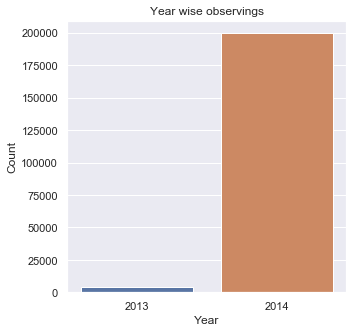

In [28]:
#compute the elapsed time feature
md = data['timestamp'].min()
ed = md - dt.timedelta(hours=1)
data['elapsed'] = data['timestamp'] - ed 
data['elapsed'] = data['elapsed'] / pd.Timedelta('1 hour')
data['elapsed'] = data['elapsed'].apply(lambda x: round(x,2))

#Compute year,month,day features
data['year'] = data['timestamp'].dt.year
data['year'] = data['year'].astype('int')

data['month'] = data['timestamp'].dt.month
data['month'] = data['month'].astype('int')

data['day'] = data['timestamp'].dt.day
data['day'] = data['day'].astype('int')

#plots
plt.figure(figsize=(5,5))
sns.countplot(x='year', data=data)
plt.title('Year wise observings')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)

Analysis:
- We can see that the data for 2013 is very less compared to 2014. We can drop 2013 values.

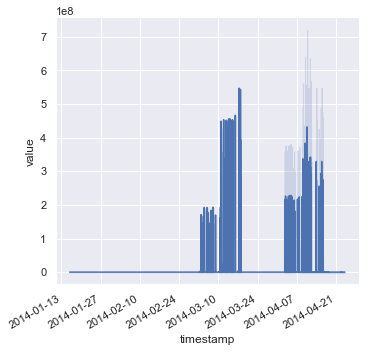

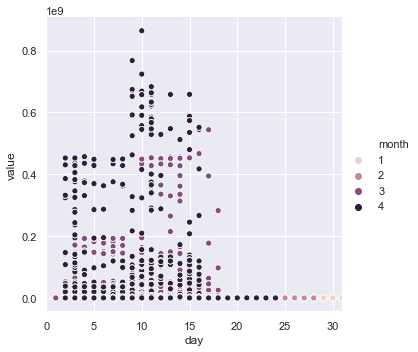

In [29]:
#Drop rows for year 2013
ind = data[data['timestamp'].dt.year == 2013].index.tolist()
data = data.drop(index=ind, axis=0)

#fig,axes = plt.subplots(1,2,sharex=True, figsize=(16,8))
lineplot = sns.relplot(x="timestamp", y="value", kind="line", data=data)
lineplot.fig.autofmt_xdate()

ax = sns.relplot(x="day", y="value", hue="month", data=data);
ax.set(xlim=(0,31))

Analysis:
- We can see our data has complex combinations of data
- Clusters are not linear or elliptical

#### Explore and Tansform the data

In [30]:
#Drop the timestamp column as model cannot process
data = data.drop(columns = ['timestamp'], axis=1)

#from projectFunctions import exploreData, transformData, splitData
exploreData(data)

data_raw = data
features = transformData(data_raw)
features_s = features
features_s = features_s.drop(columns=['year','elapsed'],axis=1)

-----------------------------------------------------------------------
Total number of records: 199491
Total number of features: 5
-----------------------------------------------------------------------


#### Split the data between training and test sizes

In [31]:
#Split the data with 30% test size.
X_train, X_test = splitData(features_s,0.3)

Features training set has 139643 samples.
Features testing set has 59848 samples.
-----------------------------------------------------------------------


#### Implement the Bayessian gaussian mixture 

In [32]:
#Implement Bayessian gaussian mixture
clusters = bayesGauMix(features_s,20)
print(clusters)

17


Analysis:
- In anamoly detection, we need to create cluster in order to seprate the anamolies (outliers) from normal (inliers) entries. Best way to determine the number of clusters for a given dataset is to run the bayesan mixture with random clusters.
- Bayesian will give us the number of clusters. In this case, I initilized with 20 clusters. But 17 clusters are enough for our dataset.

#### Implement Gaussian mixture

-----------------------------------------------------------------------
Gaussian mixture converged True in 14 iterations
[ 2.  0.  3.  1. nan]


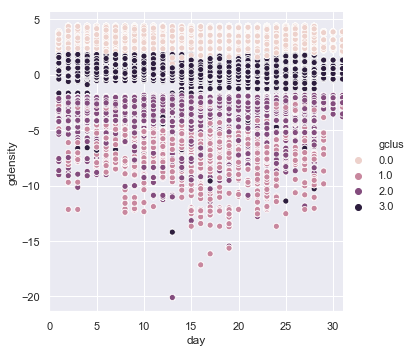

In [33]:
#Implement Gaussian mixture clustering
gm = gaussMix(X_train,4,10)
weights = np.round(gm.weights_,2)
predict = gm.predict(features_s)
prob    = gm.predict_proba(features_s)
density = gm.score_samples(features_s)
print ("-----------------------------------------------------------------------")
print ("Gaussian mixture converged %s in %d iterations" %(gm.converged_, gm.n_iter_))

data['gclus'] = pd.Series(predict.tolist())
print(data['gclus'].unique())
data['gprob'] = pd.Series(prob.tolist())
data['gdensity'] = pd.Series(density.tolist())

ax = sns.relplot(x="day", y="gdensity", hue="gclus", data=data);
ax.set(xlim=(0,31))

Analysis:
- We can see different densities of each entry in our dataset.

#### Implement Isolation forest

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\ensemble\iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


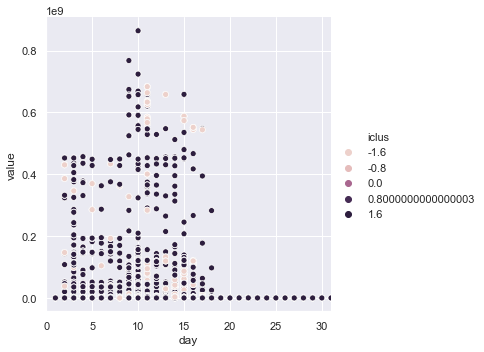

In [34]:
#Implement Isolation Forest
ifo = isoForest(X_train)
predict = ifo.predict(features_s)
density = ifo.score_samples(features_s)

data['iclus'] = pd.Series(predict.tolist())
data['idensity'] = pd.Series(density.tolist())

ax = sns.relplot(x="day", y="value", hue="iclus", data=data);
ax.set(xlim=(0,31))

Analysis:
- In the above step, we have implemented Isolation forest to isolate the anomolies. 
- We can see the anomolies highlighted in different color in our dataset.

#### Implement Local outlier

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


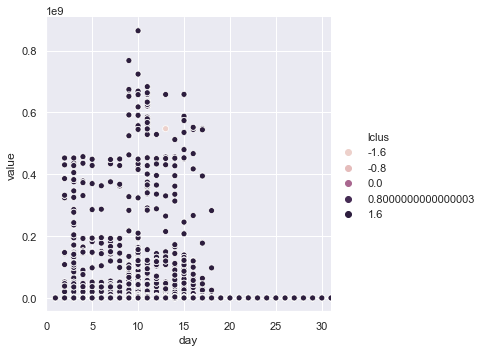

In [35]:
#Implement local outlier 
lof = locOutlier(X_train,1)
#density = lof.decision_function(features_s)
clus = lof.fit_predict(features_s)

data['lclus'] = pd.Series(clus.tolist())

ax = sns.relplot(x="day", y="value", hue="lclus", data=data);
ax.set(xlim=(0,31))

data.to_csv('test.csv',index=False)

Analysis:
- In the above step, we have implemented Local outlier model on our dataset.
- We can see this model detected few anomolies compared to Gaussian and Isolation forest. I think we need to tune the hyperparameters for this model to make it better.

Conclusion:
- In this project we have considered the CPU utilization data set with values identified from AWS cloud server. 
- Original dataset has only two columns, Timestamp and its value. We have implemetned feature engineering to compure other features that can traslate our timestamp in to model friendly feature. 
- We followed standard data exploration techniques like scaling and tuning the data to make it usefule for a model.
- We implemented Bayessian mixture model to detect the optimal number of clusters.
- Three other Clustering and anomoly (outlier) detecting algorithms Gaussian mixture, Isolation forest and Local outlier are implemeted.
- I think, Gaussian mixture performed better than other two. Underlying Gaussian nature of the data could be the reason.